In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def importarDados(insertOnes=True, filepath='/data/ex2data1.txt', names=['Prova 1', 'Prova 2', 'Aprovado']):
    path = os.getcwd() + filepath
    data = pd.read_csv(path, header=None, names=names)

    # Carregando os dados do dataset e armazendo em um array. Em seguida damos uma rapida visualizada nos dados
    data.head()

    # A primeira coluna, preenchida com 1's, represenhta o theta0
    if insertOnes:
        data.insert(0, 'Ones', 1)

    # converte de dataframes para arrays
    cols = data.shape[1]
    X = data.iloc[:, 0:cols - 1]
    y = data.iloc[:, cols - 1:cols]

    # converte de arrays para matrizes
    X = np.array(X.values)
    y = np.array(y.values)

    return data, X, y

In [3]:
def plot(data, filename = 'target/plot3.1.png'):

    # gerando o gráfico de dispersão para análise preliminar dos dados

    positivo = data[data['Aprovado'].isin([1])]
    negativo = data[data['Aprovado'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positivo['Prova 1'], positivo['Prova 2'], s=50, c='k', marker='+', label='Aprovado')
    ax.scatter(negativo['Prova 1'], negativo['Prova 2'], s=50, c='y', marker='o', label='Nao Aprovado')
    ax.legend()
    ax.set_xlabel('Nota da Prova 1')
    ax.set_ylabel('Nota da Prova 2')

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

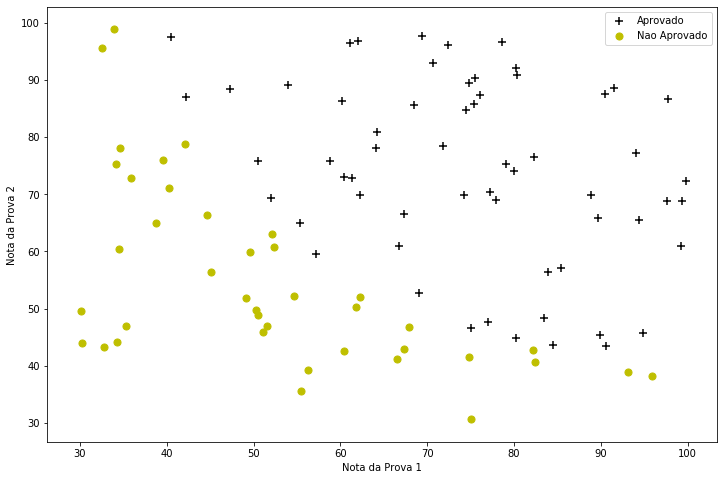

In [4]:
#como a função retorna 3 diferentes valores (data, X, y), para que a função plot possa obter os dados corretos,
#é necessário armazenar tais valores em três diferentes variáveis
data,dataX,dataY=importarDados()
#para a plotagem do gráfico, interessa apenas os valores retornados pela variável "data" da função "importarDados"
plot(data)